### Exploring Data 

In [26]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

In [27]:
data = pd.read_csv("data_with_nans.csv")
df = data.copy()
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [29]:
df.describe()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,169.000000,7.900000,4.400000,6.900000,2.500000


### Handling Null Values

In [30]:
df.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [31]:
df = df.drop(labels=[df.columns[0]], axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [32]:
df.groupby("Species").agg(["min", "max", "std", "mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [33]:
df.isnull().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [34]:
for column in df.columns[1:-1]:
    df[column].fillna(value=data[column].mean(), inplace=True)

In [35]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

In [36]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


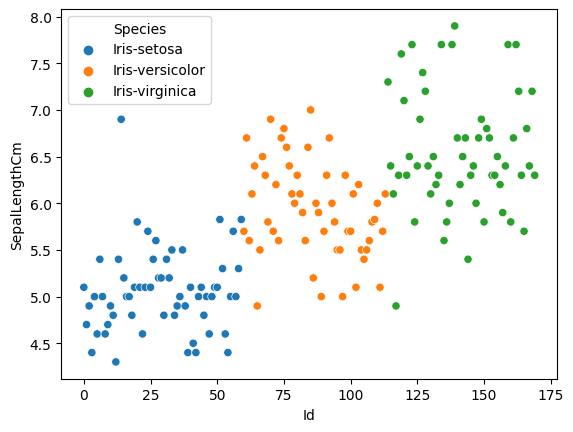

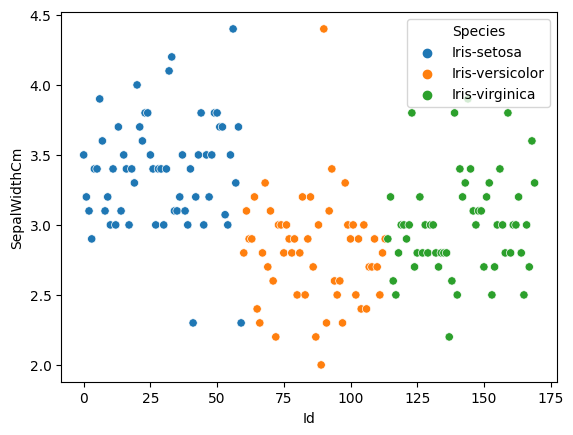

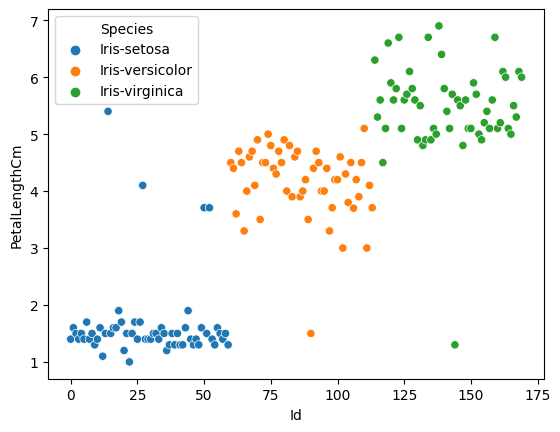

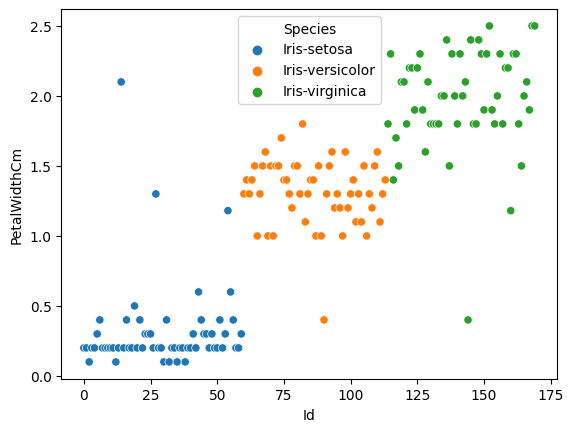

In [37]:
# Scatterplot
for column in df.columns[1:-1]:
    sns.scatterplot(data=df, x="Id", y=column, hue="Species")
    plt.show()

### Outlier Detection

#### 3 Standart Deviation

In [38]:
selected_spec = df[df["Species"] == "Iris-setosa"]
selected_column = selected_spec["SepalLengthCm"]

In [39]:
std = selected_column.std()
avg = selected_column.mean()

In [40]:
three_sigma_plus = avg + (3 * std)
three_sigma_minus = avg - (3 * std)

In [41]:
three_sigma_plus

6.397012123414941

In [42]:
three_sigma_minus

3.724744363611008

In [43]:
selected_column[((selected_spec["SepalLengthCm"] > three_sigma_plus) | (selected_spec["SepalLengthCm"] < three_sigma_minus))].index

Int64Index([14], dtype='int64')

### Dropping Outliers

In [47]:
for column in df.columns[1:-1]:
    for spec in df["Species"].unique():
        selected_spec = df[df["Species"] == spec]
        selected_column = selected_spec[column]

        std = selected_column.std()
        avg = selected_column.mean()

        three_sigma_plus = avg + (3 * std)
        three_sigma_minus = avg - (3 * std)

        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        df.drop(index=outliers, inplace=True)
        print(column, spec, outliers)

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


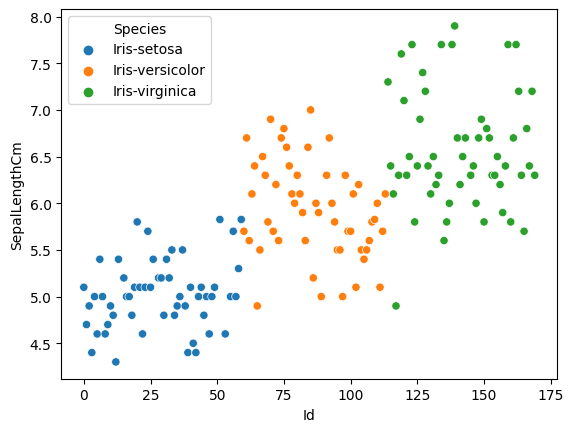

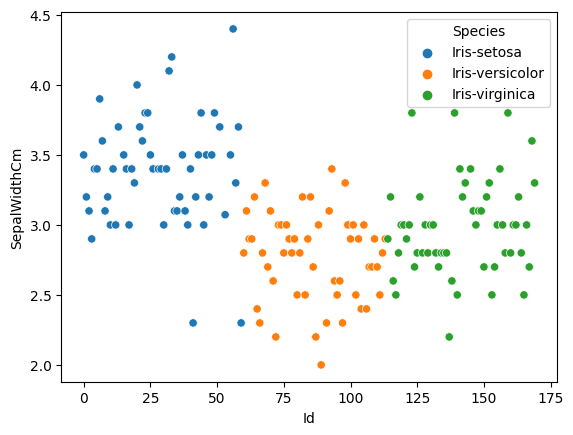

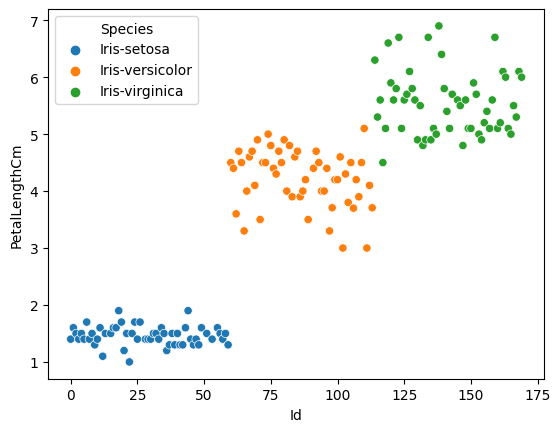

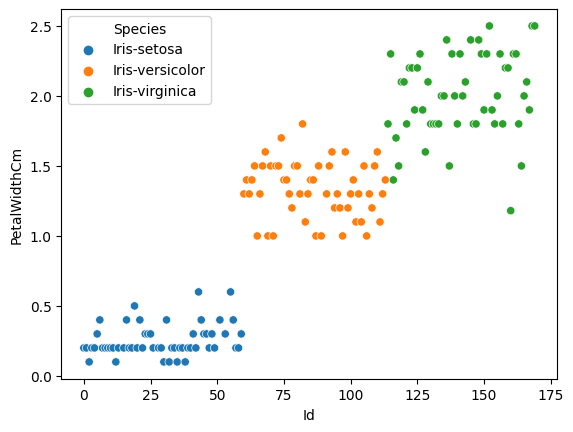

In [48]:
for column in df.columns[1:-1]:
    sns.scatterplot(data=df, x="Id", y=column, hue="Species")
    plt.show()

#### IQR - QUANTILE